In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
import tensorflow as tf

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
df_insurance_claims = pd.read_csv("./Insurance_claims.csv")

In [5]:
df_insurance_claims.head()

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,InsurerNotes,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,...,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud
0,4842,531112,715507.0,NaN,avoids a cat and hits a garage pole With deduc...,CivilServant,1/2/19,6/18/18,CollisionWithAnimal,MaterialDamages ActLiability,...,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0
1,4844,87170,71164.0,NaN,accident only expert contacts us to inform us ...,Worker,1/2/19,6/29/17,LossOfControl,MaterialDamages ActLiability,...,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0
2,4848,98706,442609.0,NaN,ae Miss/ for garage change A/ setting up EAD/ ...,Worker,1/2/19,2/5/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,...,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0
3,4849,38240,24604.0,NaN,"awaiting report to determine rc, no box checke...",CivilServant,1/2/19,1/21/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,...,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0
4,4850,11339,2933.0,229134.0,Insured in THIRD-PARTY formula Insured in a su...,Farmer,1/2/19,1/13/18,AccidentWithIdentifiedThirdParty,ActLiability,...,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0


In [6]:
df_insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11530 entries, 0 to 11529
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ReferenceId                      11530 non-null  int64  
 1   PolicyholderNumber               11530 non-null  int64  
 2   FirstPartyVehicleNumber          11035 non-null  float64
 3   ThirdPartyVehicleNumber          379 non-null    float64
 4   InsurerNotes                     9173 non-null   object 
 5   PolicyholderOccupation           11187 non-null  object 
 6   LossDate                         11530 non-null  object 
 7   FirstPolicySubscriptionDate      11530 non-null  object 
 8   ClaimCause                       11333 non-null  object 
 9   ClaimInvolvedCovers              11335 non-null  object 
 10  DamageImportance                 738 non-null    object 
 11  FirstPartyVehicleType            11518 non-null  object 
 12  ConnectionBetweenP

In [7]:
df_insurance_claims.isna().sum()

ReferenceId                            0
PolicyholderNumber                     0
FirstPartyVehicleNumber              495
ThirdPartyVehicleNumber            11151
InsurerNotes                        2357
PolicyholderOccupation               343
LossDate                               0
FirstPolicySubscriptionDate            0
ClaimCause                           197
ClaimInvolvedCovers                  195
DamageImportance                   10792
FirstPartyVehicleType                 12
ConnectionBetweenParties           11432
LossPostCode                        1408
PolicyHolderPostCode                   0
PolicyWasSubscribedOnInternet          0
NumberOfPoliciesOfPolicyholder         0
FpVehicleAgeMonths                    12
EasinessToStage                        0
ClaimWihoutIdentifiedThirdParty        0
ClaimAmount                            0
LossHour                              94
PolicyHolderAge                       36
NumberOfBodilyInjuries                 0
FirstPartyLiabil

In [8]:
nan_cols = df_insurance_claims.columns[df_insurance_claims.isna().any()].tolist()
nan_cols


['FirstPartyVehicleNumber',
 'ThirdPartyVehicleNumber',
 'InsurerNotes',
 'PolicyholderOccupation',
 'ClaimCause',
 'ClaimInvolvedCovers',
 'DamageImportance',
 'FirstPartyVehicleType',
 'ConnectionBetweenParties',
 'LossPostCode',
 'FpVehicleAgeMonths',
 'LossHour',
 'PolicyHolderAge']

<AxesSubplot:>

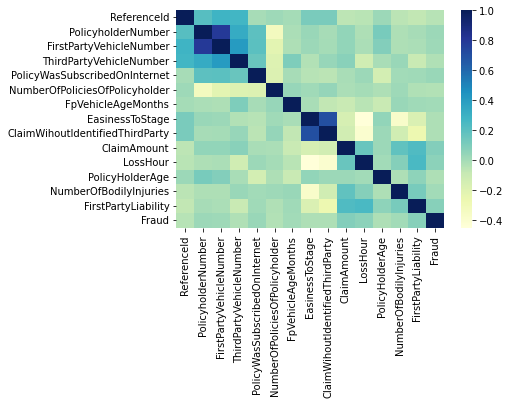

In [9]:
# Checking the correlations of Fraud status with other features
df_insurance_claims.corr(method ='pearson')

# Checking the correlations via the correlation heatmap
sns.heatmap(df_insurance_claims.corr(), cmap="YlGnBu")

In [10]:
# Pre-processing needed

# Drop duplicates
df_insurance_claims.drop_duplicates(inplace=True)
df_insurance_claims

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,InsurerNotes,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,...,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud
0,4842,531112,715507.0,NaN,avoids a cat and hits a garage pole With deduc...,CivilServant,1/2/19,6/18/18,CollisionWithAnimal,MaterialDamages ActLiability,...,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0
1,4844,87170,71164.0,NaN,accident only expert contacts us to inform us ...,Worker,1/2/19,6/29/17,LossOfControl,MaterialDamages ActLiability,...,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0
2,4848,98706,442609.0,NaN,ae Miss/ for garage change A/ setting up EAD/ ...,Worker,1/2/19,2/5/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,...,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0
3,4849,38240,24604.0,NaN,"awaiting report to determine rc, no box checke...",CivilServant,1/2/19,1/21/17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,...,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0
4,4850,11339,2933.0,229134.0,Insured in THIRD-PARTY formula Insured in a su...,Farmer,1/2/19,1/13/18,AccidentWithIdentifiedThirdParty,ActLiability,...,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,16378,452486,626487.0,NaN,NaN,Employee,2/17/21,3/15/19,WindscreenDamage,Windscreen,...,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0
11526,16379,581104,788178.0,NaN,NaN,Employee,3/7/21,7/20/17,WindscreenDamage,Windscreen,...,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0
11527,16380,817231,NaN,NaN,NaN,Employee,3/15/21,9/30/20,WindscreenDamage,Windscreen,...,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0
11528,16381,321534,468522.0,NaN,NaN,CivilServant,3/6/21,12/28/18,WindscreenDamage,Windscreen,...,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0


In [11]:
nan_cols

['FirstPartyVehicleNumber',
 'ThirdPartyVehicleNumber',
 'InsurerNotes',
 'PolicyholderOccupation',
 'ClaimCause',
 'ClaimInvolvedCovers',
 'DamageImportance',
 'FirstPartyVehicleType',
 'ConnectionBetweenParties',
 'LossPostCode',
 'FpVehicleAgeMonths',
 'LossHour',
 'PolicyHolderAge']

In [12]:
# checking if there are any claims where the vehicle numbers of the first and thrid parties are the same.
# There are none
df_insurance_claims.loc[df_insurance_claims["FirstPartyVehicleNumber"]==df_insurance_claims['ThirdPartyVehicleNumber']]

,ReferenceId,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,InsurerNotes,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,...,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud


In [13]:
# drop rows where the columns have very few na values
# FirstPartyVehicleNumber, PolicyholderOccupation, ClaimCause, ClaimInvolvedCovers, FirstPartyVehicleType, LossPostCode,
# FpVehicleAgeMonths, LossHour, PolicyHolderAge
df_insurance_claims.dropna(subset=['FirstPartyVehicleNumber', 'PolicyholderOccupation', 'ClaimCause', 'ClaimInvolvedCovers', 
                                    'FirstPartyVehicleType', 'LossPostCode', 'FpVehicleAgeMonths', 'LossHour', 'PolicyHolderAge'],
                           inplace=True)

In [14]:
# Are the policy numbers unique, or are there any people who filed claims multiple times
def get_uniqueness(df, column_names):
    for column_name in column_names:
        print("{}: Column length: {}, unique values: {}".format(column_name, len(df[column_name]), df[column_name].nunique()))

get_uniqueness(df_insurance_claims, ["PolicyholderNumber"])

# Create a new column with count of claims made by the same policy holder.
# Multiple claims by the same policy holder may likely indicate a fraud.
counts_policy_holder = df_insurance_claims['PolicyholderNumber'].value_counts()
df_insurance_claims["PolicyHolderCount"] = df_insurance_claims["PolicyholderNumber"].map(counts_policy_holder)
df_insurance_claims[["PolicyholderNumber", "PolicyHolderCount"]]

PolicyholderNumber: Column length: 9120, unique values: 7659


,PolicyholderNumber,PolicyHolderCount
0,531112,1
1,87170,2
2,98706,2
3,38240,1
4,11339,4
...,...,...
11485,267178,1
11486,808381,1
11487,772615,1
11510,555135,1


In [15]:
# Column ClaimInvolvedCovers contains a space sepaated list of strings indicating the covers that the individual took
# We convert this into onehot encoded columns
one_hot = pd.get_dummies(df_insurance_claims["ClaimInvolvedCovers"].str.split(" ", expand=True).stack()).groupby(level=0).sum()
df_insurance_claims = pd.concat([df_insurance_claims, one_hot], axis=1)

In [16]:
# Remove the columns that have too many missing values and unnecessary comlumns such as Reference ID, PolicyHolderPostcode
df_insurance_claims.drop(columns = ["ReferenceId",                     # unique 
                                    "PolicyholderNumber",              # unique
                                    "FirstPartyVehicleNumber",         # unique    
                                    "ThirdPartyVehicleNumber",         # unique
                                    "InsurerNotes",                    # dropping for now
                                    "DamageImportance",                # too many nans
                                    # "ConnectionBetweenParties",        # maybe we can fill
                                    "LossPostCode",                    # not necessary
                                    "PolicyHolderPostCode",            # not necessary
                                    "ClaimInvolvedCovers"              # already converted above
                                    ], inplace=True)

In [17]:
# reset the indices in the data
df_insurance_claims.reset_index(inplace=True)

In [18]:
# Convert the dates to datetime objects
df_insurance_claims_t_days = df_insurance_claims[["LossDate", "FirstPolicySubscriptionDate", "Fraud"]]
df_insurance_claims_t_days["LossDate"] = pd.to_datetime(df_insurance_claims_t_days["LossDate"])
df_insurance_claims_t_days["FirstPolicySubscriptionDate"] = pd.to_datetime(df_insurance_claims_t_days["FirstPolicySubscriptionDate"])

C:\Users\Soumya\AppData\Local\Temp\ipykernel_19428\3562087343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insurance_claims_t_days["LossDate"] = pd.to_datetime(df_insurance_claims_t_days["LossDate"])
C:\Users\Soumya\AppData\Local\Temp\ipykernel_19428\3562087343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insurance_claims_t_days["FirstPolicySubscriptionDate"] = pd.to_datetime(df_insurance_claims_t_days["FirstPolicySubscriptionDate"])


### Model 1 - Using a threshold on the number of days between the subscription data and the claim date

In [19]:
df_insurance_claims_t_days["Days"] = df_insurance_claims_t_days["LossDate"] - df_insurance_claims_t_days["FirstPolicySubscriptionDate"]
df_insurance_claims_t_days["Days"] = pd.to_numeric(df_insurance_claims_t_days["Days"].dt.days, downcast='integer')
df_insurance_claims_t_days = df_insurance_claims_t_days.astype({"Days": "int64"})

C:\Users\Soumya\AppData\Local\Temp\ipykernel_19428\1156946861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insurance_claims_t_days["Days"] = df_insurance_claims_t_days["LossDate"] - df_insurance_claims_t_days["FirstPolicySubscriptionDate"]
C:\Users\Soumya\AppData\Local\Temp\ipykernel_19428\1156946861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insurance_claims_t_days["Days"] = pd.to_numeric(df_insurance_claims_t_days["Days"].dt.days, downcast='integer')


In [20]:
df_fraud = df_insurance_claims_t_days.loc[df_insurance_claims_t_days["Fraud"] == 1]
df_fraud.groupby(["Days"])["Days"].count()

Days
0       11
1        4
2        8
3        2
4        6
5        4
6        7
7        2
8        2
9        2
10       2
11       2
14       4
16       2
17       3
18       2
19       1
20       1
22       2
23       2
24       2
25       1
26       1
28       2
29       2
47       1
70       1
71       1
259      1
310      1
333      1
436      1
504      1
530      1
549      1
563      1
575      1
584      1
616      1
685      1
748      1
769      1
805      1
810      1
821      1
824      1
890      1
928      1
1201     1
Name: Days, dtype: int64

In [21]:
print("max: {}, min: {}".format(df_fraud["Days"].max(), df_fraud["Days"].min()))

max: 1201, min: 0


In [22]:
def detect_fraud_model_1(t, df):
    d = []
    h = []

    for i in t:
        a = 0
        b = 0
        for j in range(len(df)):
            if df["Days"][j] <= i:
                a = a + 1
                if df["Fraud"][j] == 1:
                    
                    b = b + 1
            else:
                pass
        
        detection_rate = round((a / len(df))*100, 2)
        d.append(detection_rate)
        hit_rate = round((b / a)*100, 2)
        h.append(hit_rate)

        print("t: {}, suspicious: {}, fraud in susp: {},".format(i, a, b),
              "detection_rate: {}, hit_rate: {}, ".format(detection_rate, hit_rate),
              "num true fraud: {}, num samples: {}".format(len(df_fraud), len(df)))

    return d, h

d, h = detect_fraud_model_1(range(200), df_insurance_claims_t_days)

t: 0, suspicious: 30, fraud in susp: 11, detection_rate: 0.33, hit_rate: 36.67,  num true fraud: 101, num samples: 9120
t: 1, suspicious: 54, fraud in susp: 15, detection_rate: 0.59, hit_rate: 27.78,  num true fraud: 101, num samples: 9120
t: 2, suspicious: 72, fraud in susp: 23, detection_rate: 0.79, hit_rate: 31.94,  num true fraud: 101, num samples: 9120
t: 3, suspicious: 86, fraud in susp: 25, detection_rate: 0.94, hit_rate: 29.07,  num true fraud: 101, num samples: 9120
t: 4, suspicious: 120, fraud in susp: 31, detection_rate: 1.32, hit_rate: 25.83,  num true fraud: 101, num samples: 9120
t: 5, suspicious: 145, fraud in susp: 35, detection_rate: 1.59, hit_rate: 24.14,  num true fraud: 101, num samples: 9120
t: 6, suspicious: 171, fraud in susp: 42, detection_rate: 1.88, hit_rate: 24.56,  num true fraud: 101, num samples: 9120
t: 7, suspicious: 193, fraud in susp: 44, detection_rate: 2.12, hit_rate: 22.8,  num true fraud: 101, num samples: 9120
t: 8, suspicious: 213, fraud in susp:

Text(0, 0.5, 'Hit Rate')

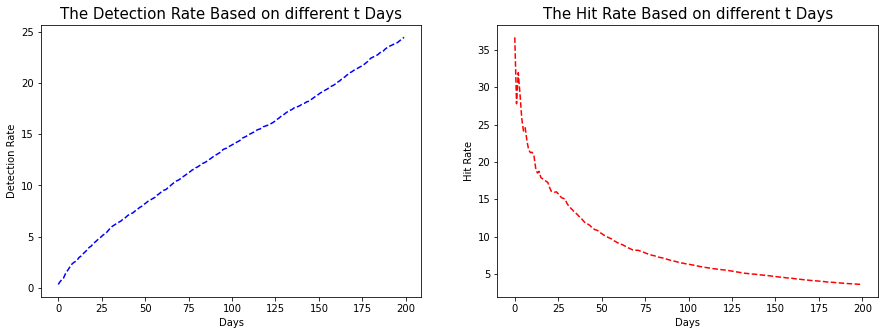

In [23]:
fig = plt.figure(figsize = (15, 5))
AX1 = fig.add_subplot(1,2,1)
AX2 = fig.add_subplot(1,2,2)
t = range(200)

AX1.plot(t, d, ls = "--", color = "blue")
AX2.plot(t, h, ls = "--", color = "red")

AX1.set_title("The Detection Rate Based on different t Days", fontsize = 15, horizontalalignment="center")
AX2.set_title("The Hit Rate Based on different t Days", fontsize = 15, horizontalalignment="center")

AX1.set_xlabel("Days", fontsize = 10)
AX1.set_ylabel("Detection Rate", fontsize = 10)

AX2.set_xlabel("Days", fontsize = 10)
AX2.set_ylabel("Hit Rate", fontsize = 10)

In [24]:
for i in t:
    print("t: {}, d: {}, h: {}".format(i, d[i], h[i]))

t: 0, d: 0.33, h: 36.67
t: 1, d: 0.59, h: 27.78
t: 2, d: 0.79, h: 31.94
t: 3, d: 0.94, h: 29.07
t: 4, d: 1.32, h: 25.83
t: 5, d: 1.59, h: 24.14
t: 6, d: 1.88, h: 24.56
t: 7, d: 2.12, h: 22.8
t: 8, d: 2.34, h: 21.6
t: 9, d: 2.48, h: 21.24
t: 10, d: 2.58, h: 21.28
t: 11, d: 2.73, h: 20.88
t: 12, d: 2.97, h: 19.19
t: 13, d: 3.08, h: 18.51
t: 14, d: 3.28, h: 18.73
t: 15, d: 3.43, h: 17.89
t: 16, d: 3.59, h: 17.74
t: 17, d: 3.8, h: 17.58
t: 18, d: 3.97, h: 17.4
t: 19, d: 4.07, h: 17.25
t: 20, d: 4.3, h: 16.58
t: 21, d: 4.44, h: 16.05
t: 22, d: 4.58, h: 16.03
t: 23, d: 4.75, h: 15.94
t: 24, d: 4.87, h: 15.99
t: 25, d: 5.02, h: 15.72
t: 26, d: 5.18, h: 15.47
t: 27, d: 5.27, h: 15.18
t: 28, d: 5.44, h: 15.12
t: 29, d: 5.64, h: 14.98
t: 30, d: 5.84, h: 14.45
t: 31, d: 5.99, h: 14.1
t: 32, d: 6.1, h: 13.85
t: 33, d: 6.22, h: 13.58
t: 34, d: 6.32, h: 13.37
t: 35, d: 6.41, h: 13.16
t: 36, d: 6.51, h: 12.96
t: 37, d: 6.66, h: 12.69
t: 38, d: 6.75, h: 12.5
t: 39, d: 6.9, h: 12.24
t: 40, d: 7.06, h: 

In [25]:
df_insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            9120 non-null   int64  
 1   PolicyholderOccupation           9120 non-null   object 
 2   LossDate                         9120 non-null   object 
 3   FirstPolicySubscriptionDate      9120 non-null   object 
 4   ClaimCause                       9120 non-null   object 
 5   FirstPartyVehicleType            9120 non-null   object 
 6   ConnectionBetweenParties         92 non-null     object 
 7   PolicyWasSubscribedOnInternet    9120 non-null   int64  
 8   NumberOfPoliciesOfPolicyholder   9120 non-null   int64  
 9   FpVehicleAgeMonths               9120 non-null   float64
 10  EasinessToStage                  9120 non-null   float64
 11  ClaimWihoutIdentifiedThirdParty  9120 non-null   int64  
 12  ClaimAmount         

In [26]:
# make a copy of the cleaned data
df_insurance_claims_nn = df_insurance_claims.copy(deep = True)
# print(df_insurance_claims_nn.info())

# add the days column as before
df_insurance_claims_nn["LossDate"] = pd.to_datetime(df_insurance_claims_nn["LossDate"])
df_insurance_claims_nn["FirstPolicySubscriptionDate"] = pd.to_datetime(df_insurance_claims_nn["FirstPolicySubscriptionDate"])
df_insurance_claims_nn["Days"] = df_insurance_claims_nn["LossDate"] - df_insurance_claims_nn["FirstPolicySubscriptionDate"]
df_insurance_claims_nn["Days"] = pd.to_numeric(df_insurance_claims_nn["Days"].dt.days, downcast='integer')
df_insurance_claims_nn = df_insurance_claims_nn.astype({"Days": "int64"})

# drop columns that are not required
df_insurance_claims_nn.drop(columns=["index", "LossDate", "FirstPolicySubscriptionDate"], inplace=True)

# get the different column types
categorical_columns = []
binary_columns = ["Fraud", "PolicyWasSubscribedOnInternet", "ClaimWithoutIdentifiedThirdParty"]
numerical_columns = []
for col in df_insurance_claims_nn.columns:
    if df_insurance_claims_nn[col].dtype not in ['int64', "float64", "uint8"]:
        categorical_columns.append(col)
    else:
        # not binary data and not previously one-hot encoded
        if col not in binary_columns and df_insurance_claims_nn[col].dtype != "uint8":
            numerical_columns.append(col)

# one hot encode the categorical columns
df_insurance_claims_nn = pd.get_dummies(df_insurance_claims_nn, drop_first=True, columns=categorical_columns)

### Autoencoder

Create the dataset for the autoencoder.
- Training data contains only non fraud samples
- Validation and test data contain equal number of fraud and non fraud data samples. These are picked randomly from the original data.

In [27]:
# separate the fraud and non-fraud samples
df_fraud_data = df_insurance_claims_nn[df_insurance_claims_nn["Fraud"] == 1]
df_non_fraud_data = df_insurance_claims_nn[df_insurance_claims_nn["Fraud"] == 0]

# separate the Fraud column from the rest of the features
x_fraud_data = df_fraud_data.drop(columns=["Fraud"])
y_fraud_data = df_fraud_data["Fraud"]
x_non_fraud_data = df_non_fraud_data.drop(columns=["Fraud"])
y_non_fraud_data = df_non_fraud_data["Fraud"]

print("Amount of fraud data: ", len(df_fraud_data))
print("Amount of non-fraud data: ", len(df_non_fraud_data))

# Create training set with only non-fraud data
# first separate out non-fraud data equal to the amount of fraud data
# num_train_samples = len(df_non_fraud_data) - len(df_fraud_data) 
x_train, x_other, y_train, y_other = train_test_split(x_non_fraud_data, y_non_fraud_data, train_size=0.9, shuffle=True, random_state=45)

# split the reamining non-fraud data into two sets
x_valid_fraud, x_test_fraud, y_valid_fraud, y_test_fraud = train_test_split(x_fraud_data, y_fraud_data, train_size=0.5, shuffle=True, random_state=86)
# split the fraud data into two sets
x_valid_non_fraud, x_test_non_fraud, y_valid_non_fraud, y_test_non_fraud = train_test_split(x_other, y_other, train_size=0.5, shuffle=True, random_state=4)

# concatenate the fraud and non fraud parts
x_valid = pd.concat([x_valid_fraud, x_valid_non_fraud], axis=0)
y_valid = pd.concat([y_valid_fraud, y_valid_non_fraud], axis=0)
x_test = pd.concat([x_test_fraud, x_test_non_fraud], axis=0)
y_test = pd.concat([y_test_fraud, y_test_non_fraud], axis=0)

# shuffle the data
# idx = np.random.permutation(x_valid.index)
# x_valid.reindex(idx)
# y_valid.reindex(idx)

# idx = np.random.permutation(x_test.index)
# x_test.reindex(idx)
# y_test.reindex(idx)

# apply standard scaler to the data
scaler = MinMaxScaler()
scaler.fit(x_train[numerical_columns])
x_train[numerical_columns] = scaler.transform(x_train[numerical_columns])
x_valid[numerical_columns] = scaler.transform(x_valid[numerical_columns])
x_test[numerical_columns] = scaler.transform(x_test[numerical_columns])

Amount of fraud data:  101
Amount of non-fraud data:  9019


In [28]:
print("train: {}".format(x_train.shape))
print("valid: {}".format(x_valid.shape))
print("test: {}".format(x_test.shape))

train: (8117, 58)
valid: (501, 58)
test: (502, 58)


1. Build the network architecture - basic model

In [29]:
# Encoder - 16 neurons in first layer, 8 neurons in second layer
encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1], )),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu")], 
    name='encoder')

# Decoder - 8 neurons in first layer, 16 neurons in second layer, 57 neurons in output layer
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(x_train.shape[1], activation="sigmoid")], 
    name='decoder')

autoencoder = tf.keras.Sequential([encoder, decoder])

In [30]:
autoencoder.build(x_train.shape)
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                944       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
Total params: 1,080
Trainable params: 1,080
Non-trainable params: 0
_________________________________________________________________


In [31]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (8117, 8)                 72        
                                                                 
 dense_3 (Dense)             (8117, 16)                144       
                                                                 
 dense_4 (Dense)             (8117, 58)                986       
                                                                 
Total params: 1,202
Trainable params: 1,202
Non-trainable params: 0
_________________________________________________________________


In [32]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Sequential)        (None, 8)                 1080      
                                                                 
 decoder (Sequential)        (8117, 58)                1202      
                                                                 
Total params: 2,282
Trainable params: 2,282
Non-trainable params: 0
_________________________________________________________________


In [33]:
autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=[tf.keras.metrics.mean_squared_error])

In [34]:
history = autoencoder.fit(x=x_train, y=x_train,
                epochs=50, batch_size=64,
                validation_split=0.2,
                # validation_data=(x_valid, x_valid)
                )

Epoch 1/50
102/102 [==============================] - 1s 2ms/step - loss: 0.1683 - mean_squared_error: 0.1683 - val_loss: 0.0745 - val_mean_squared_error: 0.0745
Epoch 2/50
102/102 [==============================] - 0s 1ms/step - loss: 0.0602 - mean_squared_error: 0.0602 - val_loss: 0.0551 - val_mean_squared_error: 0.0551
Epoch 3/50
102/102 [==============================] - 0s 1ms/step - loss: 0.0543 - mean_squared_error: 0.0543 - val_loss: 0.0538 - val_mean_squared_error: 0.0538
Epoch 4/50
102/102 [==============================] - 0s 1ms/step - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 5/50
102/102 [==============================] - 0s 1ms/step - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 6/50
102/102 [==============================] - 0s 1ms/step - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 7/50
102/102 [========

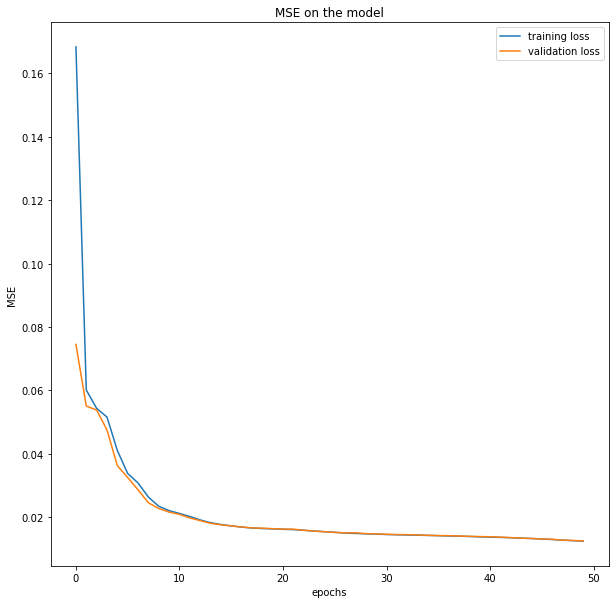

In [35]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["training loss", "validation loss"])
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.title("MSE on the model")
plt.show()

In [36]:
# function to predict and compute mse
def predict_and_compute_mse(data, model):
    data_hat = model.predict(data)
    mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)(
        data, data_hat).numpy()
    return mse, data_hat

# compute mse on validation data
x_valid_fraud = x_valid.loc[y_valid == 1, :]
x_valid_non_fraud = x_valid.loc[y_valid == 0, :]
mse_valid_fraud, x_hat_valid_fraud = predict_and_compute_mse(x_valid_fraud, autoencoder)
mse_valid_non_fraud, x_hat_valid_non_fraud = predict_and_compute_mse(x_valid_non_fraud, autoencoder)

15/15 [==============================] - 0s 609us/step


In [37]:
import matplotlib.pyplot as plt

# plots histograms of mse for fraud and non fraud cases
def plot_histograms(mse_fraud, mse_non_fraud, name):
    plt.figure(figsize=(10,8))
    plt.subplot(2,1,1)
    plt.hist(mse_fraud, color='orange',bins=np.linspace(0, 0.25, 100))
    plt.title("MSE for fraud cases on " + name)
    plt.xticks(np.linspace(0,0.25, 10))
    plt.subplot(2,1,2)
    plt.hist(mse_non_fraud, color='turquoise',bins=np.linspace(0, 0.25, 100))
    plt.title("MSE for non fraud cases on " + name)
    plt.xticks(np.linspace(0,0.25, 10))
    plt.show()

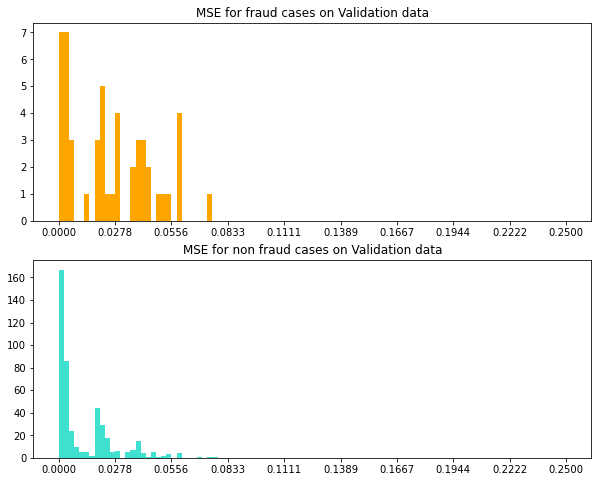

In [38]:
plot_histograms(mse_valid_fraud, mse_valid_non_fraud, "Validation data")

2. Build the network architecture - Hyper parameter tuning

In [39]:
import keras_tuner as kt
from sklearn.metrics import roc_auc_score

# define train model for hyperparameter tuning
def build(hp):
    num_units_l1 = hp.Int('num_units_l1', min_value = 30, max_value=40)
    num_units_l2 = hp.Int('num_units_l2', min_value = 20, max_value=30)
    num_units_l3 = hp.Int('num_units_l3', min_value = 5, max_value=20)
    # num_units_l4 = hp.Int('num_units_l4', min_value = 20, max_value=25)
    # num_units_l5 = hp.Int('num_units_l5', min_value = 10, max_value=20)

    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value=0.3)

    learning_rate = hp.Float('learning_rate', min_value = 0.0001, max_value=0.1, sampling='log') 

    optimizers = hp.Choice('optimizer', values=['rmsprop','adam'])

    batch_size = hp.Int('batch_size', min_value=16, max_value=128)

    epochs_until_change = 5
    steps_per_epoch = x_train.shape[0] / batch_size
    steps = epochs_until_change * steps_per_epoch
    # learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=init_learning_rate, 
    #                                                                decay_steps=steps, decay_rate=0.1)

    model = tf.keras.models.Sequential([
        # encoder
        tf.keras.layers.Input(shape=(x_train.shape[1], )),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units_l1, kernel_initializer="he_normal", name="encoder_l1",
                              kernel_regularizer=tf.keras.regularizers.L1(0.01)
                              ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),

        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units_l2, kernel_initializer="he_normal", name="encoder_l2",
                              kernel_regularizer=tf.keras.regularizers.L1(0.01)
                              ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units_l3, kernel_initializer="he_normal", name="encoder_l3",
                              kernel_regularizer=tf.keras.regularizers.L1(0.01)
                              ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),

        # # tf.keras.layers.Dropout(dropout_rate),
        # tf.keras.layers.Dense(num_units_l4, kernel_initializer="he_normal", name="encoder_l4",
        #                       kernel_regularizer=tf.keras.regularizers.L1(0.01)
        #                       ),
        # tf.keras.layers.BatchNormalization(),
        # tf.keras.layers.Activation('relu'),
        # # tf.keras.layers.Dropout(dropout_rate),
        # tf.keras.layers.Dense(num_units_l5, kernel_initializer="he_normal", name="encoder_l5",
        #                       kernel_regularizer=tf.keras.regularizers.L1(0.01)
        #                       ),
        # tf.keras.layers.BatchNormalization(),
        # tf.keras.layers.Activation('relu'),

        # decoder

        # # tf.keras.layers.Dropout(dropout_rate),
        # tf.keras.layers.Dense(num_units_l4, kernel_initializer="he_normal", name="decoder_l0",
        #                       kernel_regularizer=tf.keras.regularizers.L1(0.01)
        #                       ),
        # tf.keras.layers.BatchNormalization(),
        # tf.keras.layers.Activation('relu'),

        # # tf.keras.layers.Dropout(dropout_rate),
        # tf.keras.layers.Dense(num_units_l3, kernel_initializer="he_normal", name="decoder_l1",
        #                       kernel_regularizer=tf.keras.regularizers.L1(0.01)
        #                       ),
        # tf.keras.layers.BatchNormalization(),
        # tf.keras.layers.Activation('relu'),

        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units_l2, kernel_initializer="he_normal", name="decoder_l2",
                              kernel_regularizer=tf.keras.regularizers.L1(0.01)
                              ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units_l1, kernel_initializer="he_normal", name="decoder_l3",
                              kernel_regularizer=tf.keras.regularizers.L1(0.01)
                              ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(x_train.shape[1], kernel_initializer="glorot_uniform", name="output_layer",
                              kernel_regularizer=tf.keras.regularizers.L1(0.01)
                              ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu')])

    if optimizers == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    elif optimizers == "rmsprop":
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9, epsilon=1e-07, momentum=0.0)

    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=tf.keras.metrics.mean_squared_error
                #   metrics='auc_from_mse'
                  )

    return model

tuner = kt.Hyperband(build,
                     'val_mean_squared_error',
                    #  kt.Objective("loss", direction="min"),    # kt.Objective("loss", direction="min"),
                     max_epochs=10,
                     factor=3,
                     directory='logs',
                     project_name='autoencoder' + str(datetime.datetime.now().timestamp()))

tuner.search_space_summary()

x_tr_nf, x_va_nf, y_tr_nf, y_va_nf = train_test_split(x_train, y_train, train_size=0.7, shuffle=True)

tf.keras.backend.clear_session()
tuner.search(x_tr_nf, x_tr_nf, 
              validation_data=(x_va_nf, x_va_nf)
              )

Trial 30 Complete [00h 00m 07s]
val_mean_squared_error: 0.051712460815906525

Best val_mean_squared_error So Far: 0.045096322894096375
Total elapsed time: 00h 02m 01s
INFO:tensorflow:Oracle triggered exit


In [40]:
best_hps=tuner.get_best_hyperparameters()[0]
print(best_hps['num_units_l1'])
print(best_hps['num_units_l2'])
print(best_hps['num_units_l3'])
# print(best_hps['num_units_l4'])
# print(best_hps['num_units_l5'])
print(best_hps['optimizer'])
print(best_hps['dropout_rate'])
print(best_hps['learning_rate'])
print(best_hps['batch_size'])

35
30
17
rmsprop
0.28053760969727526
0.0009524798259211928
63


These are the values that we got using val_loss
48
38
26
13
adam
0.27755988158984424

In [41]:
# train the model with the best parameters found
num_units_l1 = best_hps['num_units_l1']
num_units_l2 = best_hps['num_units_l2']
num_units_l3 = best_hps['num_units_l3']
# num_units_l4 = best_hps['num_units_l4']
# num_units_l5 = best_hps['num_units_l5']
optimizer_choice = best_hps['optimizer']
dropout_rate = best_hps['dropout_rate']
learning_rate = best_hps['learning_rate']
batch_size = best_hps['batch_size']

model = tf.keras.models.Sequential([
    # encoder
    tf.keras.layers.Input(shape=(x_train.shape[1], )),

    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(num_units_l1, kernel_initializer="he_normal", name="encoder_l1",
                          kernel_regularizer=tf.keras.regularizers.L1(0.01)
                          ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),

    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(num_units_l2, kernel_initializer="he_normal", name="encoder_l2",
                          kernel_regularizer=tf.keras.regularizers.L1(0.01)
                          ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('tanh'),

    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(num_units_l3, kernel_initializer="he_normal", name="encoder_l3",
                          kernel_regularizer=tf.keras.regularizers.L1(0.01)
                          ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    # # tf.keras.layers.Dropout(dropout_rate),
    # tf.keras.layers.Dense(num_units_l4, kernel_initializer="he_normal", name="encoder_l4",
    #                       kernel_regularizer=tf.keras.regularizers.L1(0.01)
    #                       ),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Activation('relu'),

    # # tf.keras.layers.Dropout(dropout_rate),
    # tf.keras.layers.Dense(num_units_l5, kernel_initializer="he_normal", name="encoder_l5",
    #                       kernel_regularizer=tf.keras.regularizers.L1(0.01)
    #                       ),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Activation('relu'),

    # decoder

    # # tf.keras.layers.Dropout(dropout_rate),
    # tf.keras.layers.Dense(num_units_l4, kernel_initializer="he_normal", name="decoder_l0",
    #                       kernel_regularizer=tf.keras.regularizers.L1(0.01)
    #                       ),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Activation('relu'),
    
    # # tf.keras.layers.Dropout(dropout_rate),
    # tf.keras.layers.Dense(num_units_l3, kernel_initializer="he_normal", name="decoder_l1",
    #                       kernel_regularizer=tf.keras.regularizers.L1(0.01)
    #                       ),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(num_units_l2, kernel_initializer="he_normal", name="decoder_l2",
                          kernel_regularizer=tf.keras.regularizers.L1(0.01)
                          ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(num_units_l1, kernel_initializer="he_normal", name="decoder_l3",
                          kernel_regularizer=tf.keras.regularizers.L1(0.01)
                          ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(x_train.shape[1], kernel_initializer="glorot_uniform", name="output_layer",
                          kernel_regularizer=tf.keras.regularizers.L1(0.01)
                          ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu')])

epochs_until_change = 5
steps_per_epoch = x_train.shape[0] / batch_size
steps = epochs_until_change * steps_per_epoch

# learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=init_learning_rate, decay_steps=steps, decay_rate=0.1)

if optimizer_choice == "adam":
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
elif optimizer_choice == "rmsprop":
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9, epsilon=1e-07, momentum=0.0)

model.compile(optimizer=optimizer,
              loss='mean_squared_error',
              metrics=tf.keras.metrics.mean_squared_error
            #   metrics='auc_from_mse'
              )

cb = tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', min_delta=0.001, patience=5, restore_best_weights=True)
history = model.fit(x_tr_nf, x_tr_nf, batch_size=batch_size, epochs=20, callbacks=[cb],
                    validation_data=(x_va_nf, x_va_nf)
                    )

Epoch 1/20
91/91 [==============================] - 2s 5ms/step - loss: 9.8226 - mean_squared_error: 0.4356 - val_loss: 7.0728 - val_mean_squared_error: 0.0959
Epoch 2/20
91/91 [==============================] - 0s 2ms/step - loss: 5.5353 - mean_squared_error: 0.2797 - val_loss: 3.8320 - val_mean_squared_error: 0.0912
Epoch 3/20
91/91 [==============================] - 0s 2ms/step - loss: 2.8075 - mean_squared_error: 0.1076 - val_loss: 1.9028 - val_mean_squared_error: 0.0833
Epoch 4/20
91/91 [==============================] - 0s 2ms/step - loss: 1.3401 - mean_squared_error: 0.0705 - val_loss: 0.8932 - val_mean_squared_error: 0.0754
Epoch 5/20
91/91 [==============================] - 0s 2ms/step - loss: 0.6153 - mean_squared_error: 0.0628 - val_loss: 0.4159 - val_mean_squared_error: 0.0660
Epoch 6/20
91/91 [==============================] - 0s 2ms/step - loss: 0.2817 - mean_squared_error: 0.0532 - val_loss: 0.2022 - val_mean_squared_error: 0.0584
Epoch 7/20
91/91 [======================

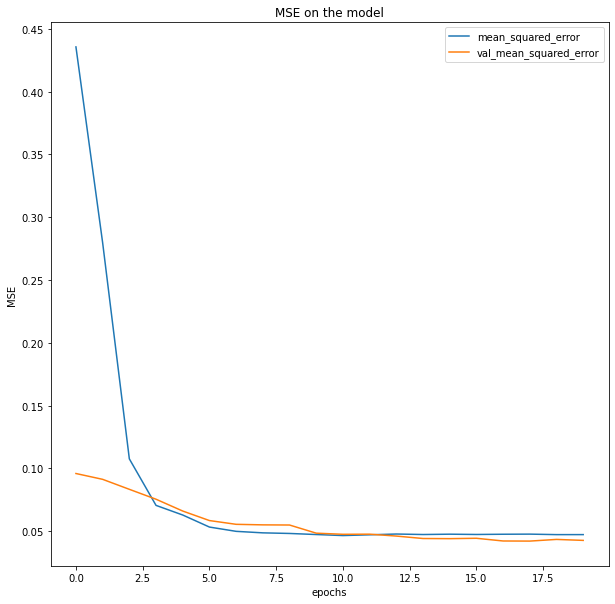

In [42]:
plt.figure(figsize=(10,10))
# plt.plot(history.history['loss'])
plt.plot(history.history['mean_squared_error'])
# plt.plot(history.history['val_loss'])
plt.plot(history.history['val_mean_squared_error'])
plt.legend([
    # "training loss", 
    "mean_squared_error", 
    # "validation loss", 
    "val_mean_squared_error"])
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.title("MSE on the model")
plt.show()

77/77 [==============================] - 0s 649us/step


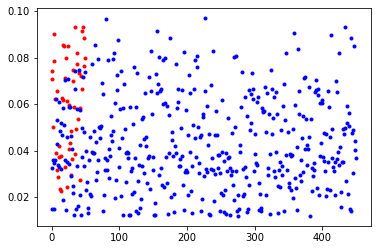

In [43]:
# compute mse on validation data
x_valid_fraud = x_valid.loc[y_valid == 1, :]
x_valid_non_fraud = x_valid.loc[y_valid == 0, :]
mse_valid_fraud, x_hat_valid_fraud = predict_and_compute_mse(x_valid_fraud, model)
mse_valid_non_fraud, x_hat_valid_non_fraud = predict_and_compute_mse(x_valid_non_fraud, model)

mse_tr_nf, x_hat_tr_nf = predict_and_compute_mse(x_tr_nf, model)
mse_va_nf, x_hat_va_nf = predict_and_compute_mse(x_va_nf, model)

plt.plot(mse_valid_fraud, 'r.')
plt.plot(mse_valid_non_fraud, 'b.')

# plt.plot(mse_tr_nf, "g.")
# plt.plot(mse_va_nf, "k.")

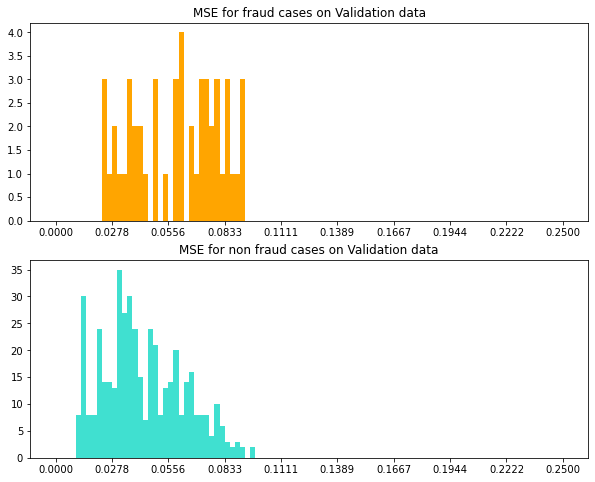

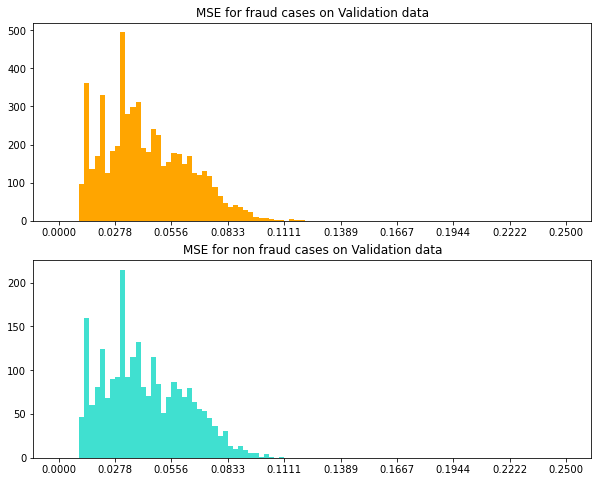

In [44]:
# plt.figure()
plot_histograms(mse_valid_fraud, mse_valid_non_fraud, "Validation data")
plot_histograms(mse_tr_nf, mse_va_nf, "Validation data")

<Figure size 1080x360 with 0 Axes>

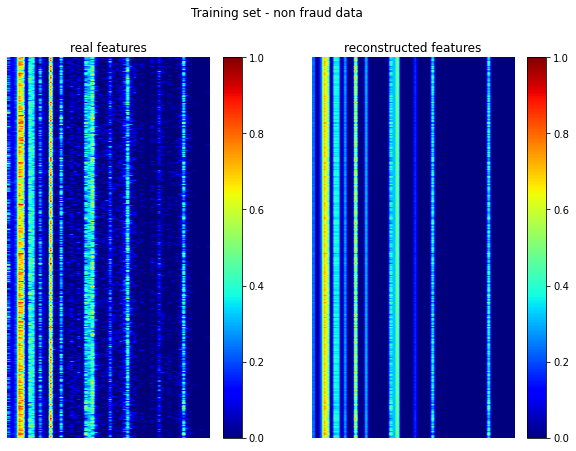

<Figure size 1080x360 with 0 Axes>

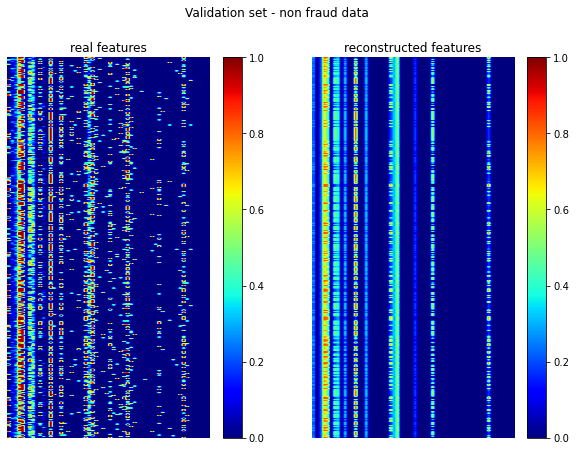

<Figure size 1080x360 with 0 Axes>

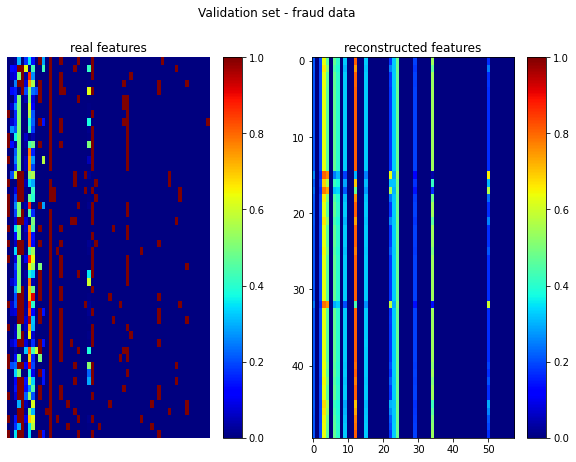

In [45]:
plt.figure(figsize=(15, 5))
plt.subplots(1,2,figsize=(10,7))
plt.suptitle("Training set - non fraud data")
plt.subplot(1, 2, 1)
plt.imshow(x_tr_nf.to_numpy(), aspect='auto', cmap="jet", interpolation=None, vmin=0, vmax=1)
plt.colorbar()
plt.axis('off')
plt.title("real features")
plt.subplot(1, 2, 2)
plt.imshow(x_hat_tr_nf, aspect='auto', cmap="jet", interpolation=None,vmin=0, vmax=1)
plt.colorbar()
plt.axis('off')
plt.title("reconstructed features")

plt.figure(figsize=(15, 5))
plt.subplots(1,2,figsize=(10,7))
plt.suptitle("Validation set - non fraud data")
plt.subplot(1, 2, 1)
plt.imshow(x_valid_non_fraud.to_numpy(), aspect='auto', cmap="jet", interpolation=None, vmin=0, vmax=1)
plt.colorbar()
plt.axis('off')
plt.title("real features")
plt.subplot(1, 2, 2)
plt.imshow(x_hat_valid_non_fraud, aspect='auto', cmap="jet", interpolation=None, vmin=0, vmax=1)
plt.colorbar()
plt.axis('off')
plt.title("reconstructed features")
plt.show()

plt.figure(figsize=(15, 5))
plt.subplots(1,2,figsize=(10,7))
plt.suptitle("Validation set - fraud data")
plt.subplot(1, 2, 1)
plt.imshow(x_valid_fraud.to_numpy(), aspect='auto', cmap="jet", interpolation=None, vmin=0, vmax=1)
plt.colorbar()
plt.axis('off')
plt.title("real features")
plt.subplot(1, 2, 2)
plt.imshow(x_hat_valid_fraud, aspect='auto', cmap="jet", interpolation=None, vmin=0, vmax=1)
plt.colorbar()
# plt.axis('off')
plt.title("reconstructed features")
plt.show()

16/16 [==============================] - 0s 860us/step
0.06176061928272247


Text(33.0, 0.5, 'actual labels')

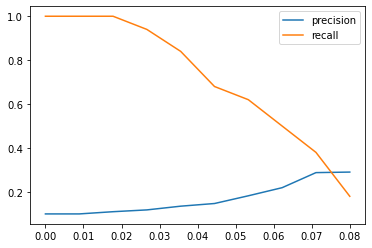

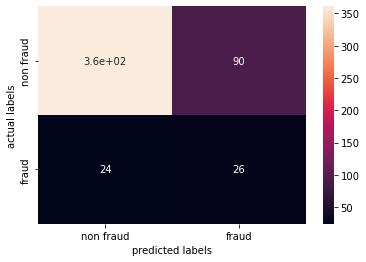

In [52]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, auc, roc_curve

mse_valid, x_hat_valid = predict_and_compute_mse(x_valid, model)
precisions = []
recalls = []
thresholds = np.linspace(0, 0.08, 10)
for t in thresholds:
    y_pred = mse_valid > t
    precisions.append(precision_score(y_valid, y_pred))
    recalls.append(recall_score(y_valid, y_pred))


# fpr, tpr, thresholds = roc_curve(y_valid, mse_valid, pos_label=2)
# print(auc(fpr, tpr))

plt.figure()
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
_=plt.legend(["precision", "recall"])

threshold = np.percentile(mse_tr_nf, 80)
print(threshold)
y_pred = mse_valid > threshold
cmat = confusion_matrix(y_valid.to_numpy(), y_pred)

plt.figure()
sns.heatmap(cmat, annot=True, xticklabels=["non fraud", "fraud"], yticklabels=["non fraud", "fraud"])
plt.xlabel("predicted labels")
plt.ylabel("actual labels")

16/16 [==============================] - 0s 824us/step
Test data size: 502
Suspicious: 121
detection rate: 0.2410358565737052, hit rate: 0.17355371900826447


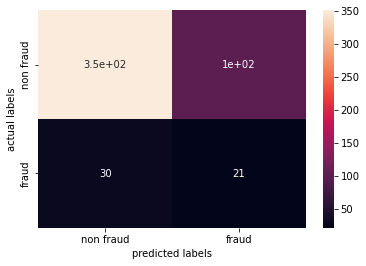

In [53]:
# prediction on test data
mse_test, x_hat_test = predict_and_compute_mse(x_test, model)
y_pred_test = mse_test > threshold

cmat = confusion_matrix(y_test.to_numpy(), y_pred_test)

plt.figure()
sns.heatmap(cmat, annot=True, xticklabels=["non fraud", "fraud"], yticklabels=["non fraud", "fraud"])
plt.xlabel("predicted labels")
plt.ylabel("actual labels")

print("Test data size: {}".format(y_pred_test.shape[0]))
print("Suspicious: {}".format(sum(y_pred_test)))

detection_rate = sum(y_pred_test) / y_pred_test.shape[0]
hit_rate = sum(y_pred_test * y_test) / sum(y_pred_test)

print("detection rate: {}, hit rate: {}".format(detection_rate, hit_rate))